In [1]:
import dropbot
import mr_box_peripheral_board as mrbox
import logging; logging.basicConfig(level=logging.DEBUG)
import time

import serial
import numpy as np

#Connect to dropbot
try:
    db_proxy.terminate()
except:
    pass

db_proxy = dropbot.SerialProxy()
print db_proxy.properties

#Connect to peripheral
# reload(mrbox)

# Try to connect to MR-Box control board.
retry_count = 2
for i in xrange(retry_count):
    try:
        proxy.terminate()
    except NameError:
        pass
    try:
        proxy = mrbox.SerialProxy(port='COM12',baudrate=57600, settling_time_s=2.5)
        break
    except serial.SerialException:
        time.sleep(1)
else:
    raise IOError('Could not connect to MR-Box control board.')

print proxy.properties
proxy._timeout_s = 20

DEBUG:trollius:Using selector: SelectSelector
DEBUG:base_node_rpc.async:`ProactorEventLoop` required, not `<class 'trollius.windows_events._WindowsSelectorEventLoop'>`loop in background thread.
DEBUG:base_node_rpc.async:Execute new loop in background thread.
DEBUG:trollius:Using proactor: IocpProactor
DEBUG:base_node_rpc._async_py27:Timed out waiting for: {'baudrate': 9600, 'port': u'COM12'}
ERROR:trollius:Future/Task exception was never retrieved
WindowsError: [Error 6] The handle is invalid
DEBUG:base_node_rpc.async:`ProactorEventLoop` required, not `<class 'trollius.windows_events._WindowsSelectorEventLoop'>`loop in background thread.
DEBUG:base_node_rpc.async:Execute new loop in background thread.
DEBUG:trollius:Using proactor: IocpProactor
DEBUG:base_node_rpc.proxy:Attempt to connect to device on port COM7 (baudrate=115200)
DEBUG:serial_device.threaded:Open `COM7` and monitor connection status
DEBUG:serial_device.threaded:connection_made: `COM7` `<ReaderThread(Thread-11, started d

base_node_software_version                                       0.48.1
package_name                                                    dropbot
display_name                                                    DropBot
manufacturer                                              Sci-Bots Inc.
url                           http://gitlab.com/sci-bots/dropbot.py.git
software_version                                                   1.48
dtype: object


DEBUG:base_node_rpc._async_py27:Timed out waiting for: {'port': 'COM12'}
ERROR:trollius:Future/Task exception was never retrieved
WindowsError: [Error 6] The handle is invalid
DEBUG:base_node_rpc.proxy:Attempt to connect to device on port COM12 (baudrate=57600)
DEBUG:serial_device.threaded:Open `COM12` and monitor connection status
DEBUG:serial_device.threaded:connection_made: `COM12` `<ReaderThread(Thread-14, started daemon 2016)>`
DEBUG:base_node_rpc.proxy:Wait for connection to port COM12
INFO:base_node_rpc.proxy:Successfully connected to mr-box-peripheral-board on port COM12


base_node_software_version                                                 0.29
package_name                                            mr-box-peripheral-board
display_name                                                 MR-Box peripherals
manufacturer                                          Wheeler Microfluidics Lab
url                           https://github.com/wheeler-microfluidics/mr-bo...
software_version                                                           0.30
dtype: object


In [15]:
'''Purge Pump'''
for i in range(1,100,10):
    proxy.pump_frequency_set(10*i)
    proxy.pump_activate()
    time.sleep(0.2)
proxy.pump_deactivate()
print 'Pump Primed!'

Pump Primed!


In [8]:
#Turn on Channel 24 - Pump reservoir
db_proxy.hv_output_enabled = True
db_proxy.hv_output_selected = True
db_proxy.voltage = 100

state = np.zeros(db_proxy.number_of_channels)
state[24] = 1
db_proxy.state_of_channels = state

capacitance = []

<IPython.core.display.Javascript object>


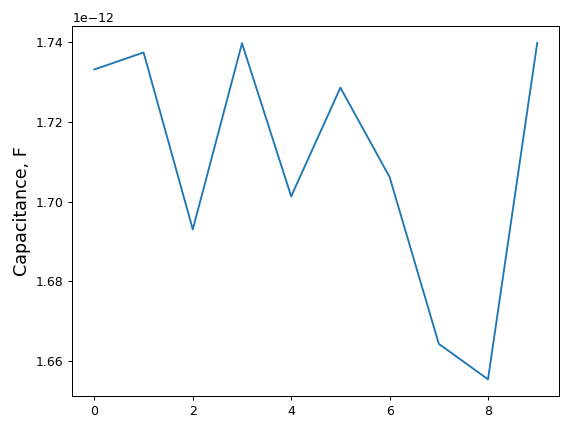

In [9]:
%matplotlib notebook
import dropbot.hardware_test
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

capacitance = []

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Capacitance, F', fontsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

for j in range (0,10):
    x = []
    for i in range(0,100):
        x.append(db_proxy.measure_capacitance())
    cap = sum(x)/len(x) 
    capacitance.append(cap)
    ax.cla()
    ax.set_ylabel('Capacitance, F', fontsize=14)
    ax.plot(capacitance)
    fig.canvas.draw()
    
# print capacitance


fig.tight_layout()

In [4]:
state[24] = 0
db_proxy.state_of_channels = state

In [30]:
'''Turn off all electrodes'''
state = np.zeros(db_proxy.number_of_channels)
db_proxy.state_of_channels = state
print db_proxy.state_of_channels

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


<IPython.core.display.Javascript object>


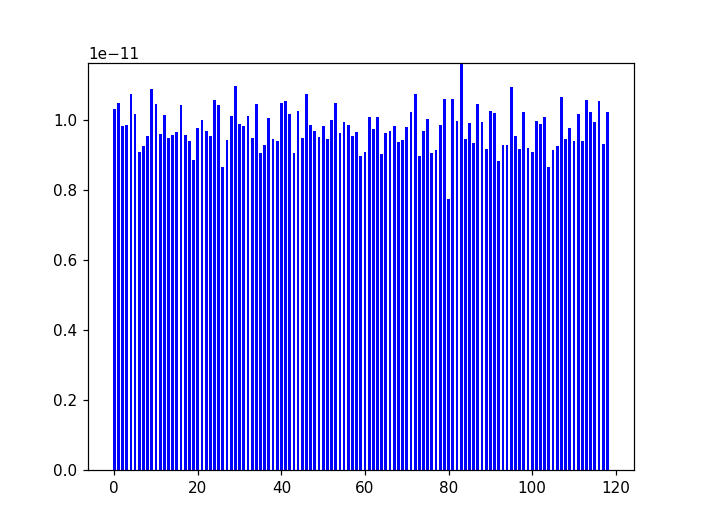

<Container object of 119 artists>

In [36]:
%matplotlib notebook
import matplotlib.pyplot as plt
# state[24] = 1
# state[40] = 1
# ll = []
# for i in range(0,119):
#     state[i] = 1 
#     db_proxy.state_of_channels = state
# # print db_proxy.state_of_channels
#     ll.append( db_proxy.measure_capacitance())
#     state[i] = 0
    
fig, ax1 = plt.subplots()
width = 1/1.5
plt.bar(list(range(0,119)), ll, width, color="blue")

In [117]:
import time
from scipy.optimize import curve_fit
proxy.pump_frequency_set(8500)
state[24] = 1 # Up 40 Mid 24 Down 16 
db_proxy.state_of_channels = state

for i in range(0,100):
    x.append(db_proxy.measure_capacitance())
cap_ini = sum(x)/len(x)
print 'Capacitance of empty reservoir: %s'%cap_ini
cap = cap_ini
start_time = time.time()
end_time = start_time
dt = end_time-start_time
c = []
sdt = []

c.append(cap)
sdt.append(dt)

def func(x, a, b):
    return a * x + b

points = 0
c = []
sdt = []
start_time = time.time()
# while ((cap<cap_ini*15) and (dt<10)):
while (dt<15):
    proxy.pump_activate()
    time.sleep(0.25)
    proxy.pump_deactivate()
    
    x = []
    for i in range(0,10):
        x.append(db_proxy.measure_capacitance())
    cap = sum(x)/len(x)
    c.append(cap)
    end_time = time.time()
    dt = end_time-start_time
    sdt.append(dt)
    
    y_calc = 0
    if (points > 3):
        cdt = np.array(dt)
        res = cap - y_calc
        r_val = (abs(res) / c[0])
#         print r_val
        if (r_val>= 8.0): 
            print ('Stopped! @ {:.2f} , {:.2f}').format(r_val, dt)
            break
        x_axis = np.array(sdt)
        y_axis = np.array(c)
        popt, pcov = curve_fit(func, x_axis, y_axis)
        y_calc = func(cdt, *popt)
        
    points += 1 
    
print ('Capacitance of filled reservoir: {}').format(cap)

Capacitance of empty reservoir: 1.62973728398e-12
Stopped! @ 8.08 , 4.31
Capacitance of filled reservoir: 1.65560349106e-10


<IPython.core.display.Javascript object>


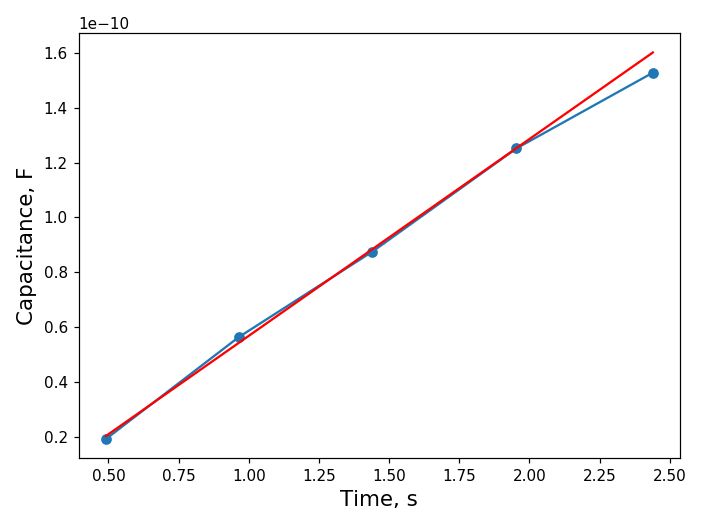

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
fig, ax1 = plt.subplots()

y_list = []
r_list = []


def func(x, a, b):
    return a * x + b

min_ = 2
max_ = len(c)
offset = 0
min_ = min_ + offset

for i in range (min_, max_):
    x_axis = np.array(sdt[offset:i])
    y_axis = np.array(c[offset:i])
    
    new_y = c[i:i+1]
    new_x = np.array(sdt[i:i+1])
    # der = []
    # der.append(0)
    # for i in range(1,len(y_axis)):
    #     k = (c[i]-c[i-1])/(sdt[i]-sdt[i-1])
    #     der.append(k)
    
    popt, pcov = curve_fit(func, x_axis, y_axis)
#     print popt
    
    y_calc = func(new_x, *popt)
    y_list.append(y_calc)
    r_list.append(( new_y -y_calc)/y_axis[0])

x_axis = np.array(sdt)
y_axis = np.array(c)

ax1.plot(x_axis, y_axis, 'o-')
ax1.set_ylabel('Capacitance, F', fontsize=14)
ax1.set_xlabel('Time, s', fontsize=14)
ax1.plot(x_axis, func(x_axis, *popt), 'r-')

# ax2 = ax1.twinx()
# fig, ax2 = plt.subplots()
# ax2.plot(np.array(sdt[min_:max_]),r_list, 'o-',color = 'green')
# print r_list

fig.tight_layout()

<IPython.core.display.Javascript object>


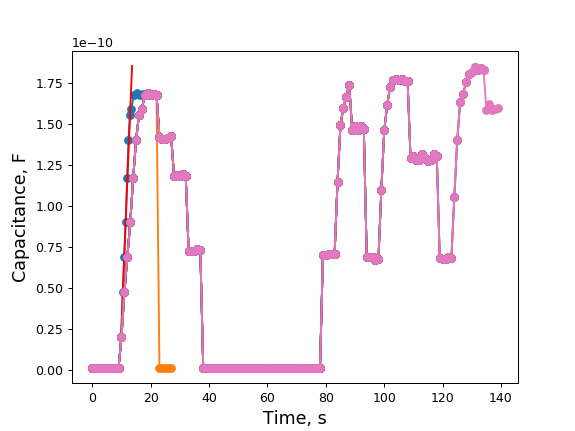

In [121]:
offset = len(capacitance[:10])-0.5 
xx = x_axis + offset
x3 = list(range(0 , len(capacitance[:10])))

for i in list(xx):
    x3.append(i)

yy = capacitance[:10]
for i in list(y_axis):
    yy.append(i)

for i in range(0,5):
    x3.append(x3[-1]+1)
    x = []
    for j in range(0,10):
        x.append(db_proxy.measure_capacitance())
    cap = sum(x)/len(x)
    yy.append(cap)
    
fig, ax1 = plt.subplots()

ax1.plot(x3, yy, 'o-')
ax1.set_ylabel('Capacitance, F', fontsize=14)
ax1.set_xlabel('Time, s', fontsize=14)
x_points = np.linspace(xx.min()-0.3, xx.max()+0.3, x_axis.shape[0])
ax1.plot(x_points, func(x_points - offset, *popt), 'r-')

In [169]:
state[32] = 0
state[24] = 1
db_proxy.state_of_channels = state

In [172]:
state = np.zeros(db_proxy.number_of_channels)
db_proxy.state_of_channels = state

In [134]:
# for i in range(0,5):
#     del x3[-1]
#     del yy[-1]

In [187]:
state[24] = 1
db_proxy.state_of_channels = state

for i in range(0,5):
    x3.append(x3[-1]+1)
    x = []
    for j in range(0,10):
        x.append(db_proxy.measure_capacitance())
    cap = sum(x)/len(x)
    yy.append(cap)
ax1.plot(yy, 'o-')

In [185]:
state[24] = 1
db_proxy.state_of_channels = state

while (cap<max(yy)):
    proxy.pump_activate()
    time.sleep(0.25)
    proxy.pump_deactivate()
    
    x = []
    for j in range(0,10):
        x.append(db_proxy.measure_capacitance())
    cap = sum(x)/len(x)
    x3.append(x3[-1]+1)
    yy.append(cap)
ax1.plot(yy, 'o-')   

In [205]:
import pandas as pd
from collections import OrderedDict
data = OrderedDict([('Time',x3),('Capacitance', yy)])
cal_line = OrderedDict([('Time_cal',x_points),('Capacitance_cal', func(x_points - offset, *popt))])
df1 = pd.DataFrame(data)
df2 = pd.DataFrame(cal_line)

result = pd.concat([df1, df2], axis=1)

result.to_excel('example.xlsx')

In [12]:
max_cap = 0
mc=[]
for i in range(0,100):
    mc.append(db_proxy.measure_capacitance())
max_cap = sum(mc)/len(mc)
print 'Capacitance of reservoir: %s'%max_cap

Capacitance of reservoir: 1.9126987569e-10


Capacitance of filled reservoir: 2.06729595521e-10


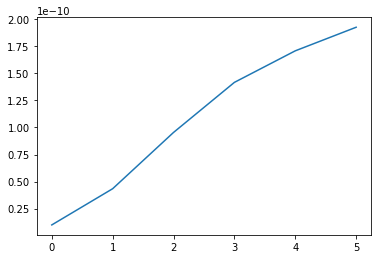

DEBUG:serial_device.threaded:Connection to port `COM11` lost: call to ClearCommError failed
DEBUG:serial_device.threaded:Connection to port `COM12` lost: call to ClearCommError failed
DEBUG:base_node_rpc.proxy:Connection lost `COM11`
DEBUG:base_node_rpc.proxy:Connection lost `COM12`
DEBUG:serial_device.threaded:Open `COM11` and monitor connection status
DEBUG:serial_device.threaded:Open `COM12` and monitor connection status


In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
import time

proxy.pump_frequency_set(8000)
state[24] = 1
db_proxy.state_of_channels = state

cap = 0
max_cp = round(max_cap, 12)
start_time = time.time()
end_time = start_time
dt = end_time-start_time
c=[]
while ((cap< max_cp) and (dt<5)):
    proxy.pump_activate()
    x = []
    for i in range(0,10):
        x.append(db_proxy.measure_capacitance())
    cap = sum(x)/len(x)
    c.append(cap)
    end_time = time.time()
    dt = end_time-start_time
    proxy.pump_deactivate()
for i in range(0,100):
    x.append(db_proxy.measure_capacitance())
cap = sum(x)/len(x)
print 'Capacitance of filled reservoir: %s'%cap
plt.plot(c)
tries.append(c)

In [108]:
import pandas as pd

df = pd.DataFrame(tries)
df = df.transpose()


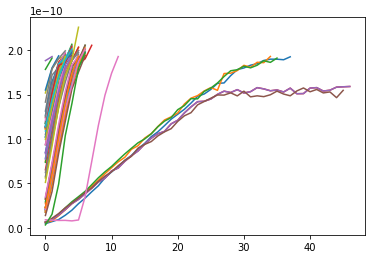

In [117]:
import seaborn
f, ax = plt.subplots()

ax.plot(df)